In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [26]:
df = pd.read_csv("../../dataset/pompa-v2.csv")

In [27]:
df.head()

,timestamp,adc_actuator_pump,adc_level,adc_temp,adc_flow,adc_pressure_left,adc_pressure_right,level,temp,flow,pressure_left,pressure_right
0,1682995718071563000,774.0,241.0,424.0,592.0,351.0,266.0,0.34,26.88,142.72,0.38,0.19
1,1682995719071057000,775.0,242.0,425.0,592.0,351.0,261.0,0.35,27.00,142.72,0.38,0.17
2,1682995720074546000,775.0,243.0,424.0,590.0,348.0,262.0,0.36,26.88,141.99,0.38,0.18
3,1682995721074034000,775.0,244.0,424.0,582.0,351.0,265.0,0.37,26.88,139.05,0.38,0.18
4,1682995722073347000,774.0,243.0,425.0,585.0,354.0,260.0,0.36,27.00,140.15,0.39,0.17


In [28]:
df.describe()

,timestamp,adc_actuator_pump,adc_level,adc_temp,adc_flow,adc_pressure_left,adc_pressure_right,level,temp,flow,pressure_left,pressure_right
count,2.192000e+04,21920.000000,21920.000000,21920.000000,21920.000000,21920.000000,21920.000000,21920.000000,21920.000000,21920.000000,21920.000000,21920.000000
mean,1.683007e+18,774.305246,485.446077,442.119936,591.841880,363.805703,266.119526,2.737928,29.020214,142.662244,0.413439,0.186536
std,6.335451e+12,1.183987,39.506423,5.736976,5.604357,4.707152,3.039837,0.387410,0.676978,2.055927,0.011413,0.008003
min,1.682996e+18,767.000000,241.000000,423.000000,568.000000,348.000000,254.000000,0.340000,26.760000,133.910000,0.380000,0.160000
25%,1.683001e+18,774.000000,471.000000,438.000000,588.000000,360.000000,264.000000,2.590000,28.530000,141.250000,0.400000,0.180000
50%,1.683007e+18,774.000000,497.000000,443.000000,592.000000,364.000000,266.000000,2.850000,29.120000,142.720000,0.410000,0.190000
75%,1.683012e+18,775.000000,509.000000,447.000000,596.000000,367.000000,268.000000,2.970000,29.600000,144.190000,0.420000,0.190000
max,1.683018e+18,780.000000,522.000000,454.000000,612.000000,378.000000,277.000000,3.090000,30.420000,150.060000,0.450000,0.210000


In [29]:
print(len(df))

21920


<Axes: >

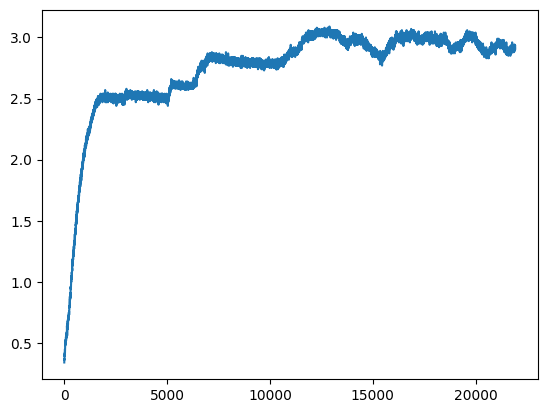

In [30]:
df["level"].plot()

# df.plot(subplots=True, figsize=(100, 50), linewidth=3)

<Axes: >

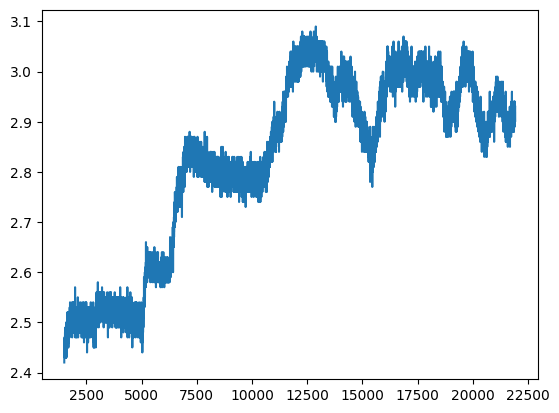

In [31]:
df["level"][1500:].plot()

In [37]:
df = df[1500:]
n = len(df)
train_df = df[0:int(n*0.8)]
test_df = df[int(n*0.8):]

In [41]:
features_considered = []
for column in df.columns:
  ks_result = stats.ks_2samp(train_df[column],test_df[column])
  print(column, ks_result)
  if (ks_result.statistic < 0.2):
    features_considered.append(column)

print(features_considered)

timestamp KstestResult(statistic=1.0, pvalue=0.0, statistic_location=1683013574341574000, statistic_sign=1)
adc_actuator_pump KstestResult(statistic=0.1764201762977473, pvalue=2.061377783390628e-89, statistic_location=774.0, statistic_sign=-1)
adc_level KstestResult(statistic=0.5817213516160626, pvalue=0.0, statistic_location=497.0, statistic_sign=1)
adc_temp KstestResult(statistic=0.844086679725759, pvalue=0.0, statistic_location=446.0, statistic_sign=1)
adc_flow KstestResult(statistic=0.07394711067580803, pvalue=5.556476582843971e-16, statistic_location=586.0, statistic_sign=1)
adc_pressure_left KstestResult(statistic=0.15126101860920665, pvalue=1.0031471146896968e-65, statistic_location=360.0, statistic_sign=1)
adc_pressure_right KstestResult(statistic=0.19760039177277178, pvalue=2.944600724580984e-112, statistic_location=264.0, statistic_sign=1)
level KstestResult(statistic=0.5817213516160626, pvalue=0.0, statistic_location=2.85, statistic_sign=1)
temp KstestResult(statistic=0.8440